In [1]:
import pandas as pd
import numpy as np
import os 
import sys
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../")
import utils as ut

In [2]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDInputs/_global_clusters.csv"

df = pd.read_csv(fpath)
df.head()

,Unnamed: 0,cellId,cellType,sampleInfo
0,0,AAACGAACAGCAGTAG.1_ND,B cells,ND
1,1,AAAGAACGTCTACAGT.1_ND,Mac1,ND
2,2,AAAGAACTCCTCGCAT.1_ND,Mac1,ND
3,3,AAAGGGCGTTAGGGTG.1_ND,Mac3,ND
4,4,AACAAAGAGTATAGGT.1_ND,Monocytes,ND


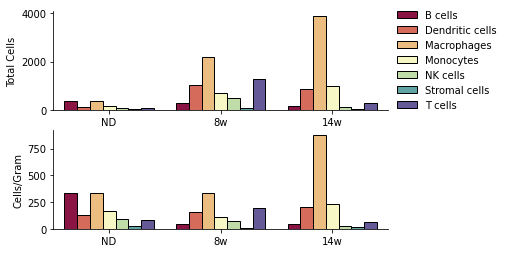

In [3]:
df['metaType'] = np.where(df['cellType'].str.contains("Mac"), 'Macrophages', df['cellType'])

gx = df.groupby(['sampleInfo', 'metaType'])['cellId'].count().reset_index()

keyMap = {
    'ND' : 'ND',
    'HFD8' : '8w',
    'HFD14' : '14w',
}
gx.columns = ['key', 'cellType', 'count']
gx['keyName'] = gx['key'].map(keyMap)

# in grams
weights = {
    'ND' : 1.079,
    'HFD8' : 6.573,
    'HFD14' : 4.412,
}

gx['weight'] = gx['key'].map(weights)
gx['cpg'] = gx['count'] / gx['weight'] 


gx = gx.sort_values(by=['key', 'cellType'], ascending=[False, True])

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 6, 3.5
plt.rcParams['figure.dpi'] = 300

fig, axs = plt.subplots(2, 1)
axs = axs.ravel()


sns.barplot(data=gx, 
            x='keyName', 
            y='count',
            edgecolor='k',
            hue='cellType',
            palette=ut.COLORS, 
            ax=axs[0]
           )



axs[0].set_ylabel('Total Cells')
axs[0].set_xlabel('')



sns.barplot(data=gx, 
            x='keyName', 
            y='cpg',
            # legend=False,
            edgecolor='k',
            hue='cellType',
            palette=ut.COLORS, 
            ax=axs[1]
           )

axs[1].set_ylabel('Cells/Gram')
axs[1].set_xlabel('')
axs[1].legend().remove()

sns.move_legend(axs[0], 
                title="",
                frameon=False,
                bbox_to_anchor=(1.35, 1.1),
                loc='upper right')



sns.despine()
# plt.tight_layout()


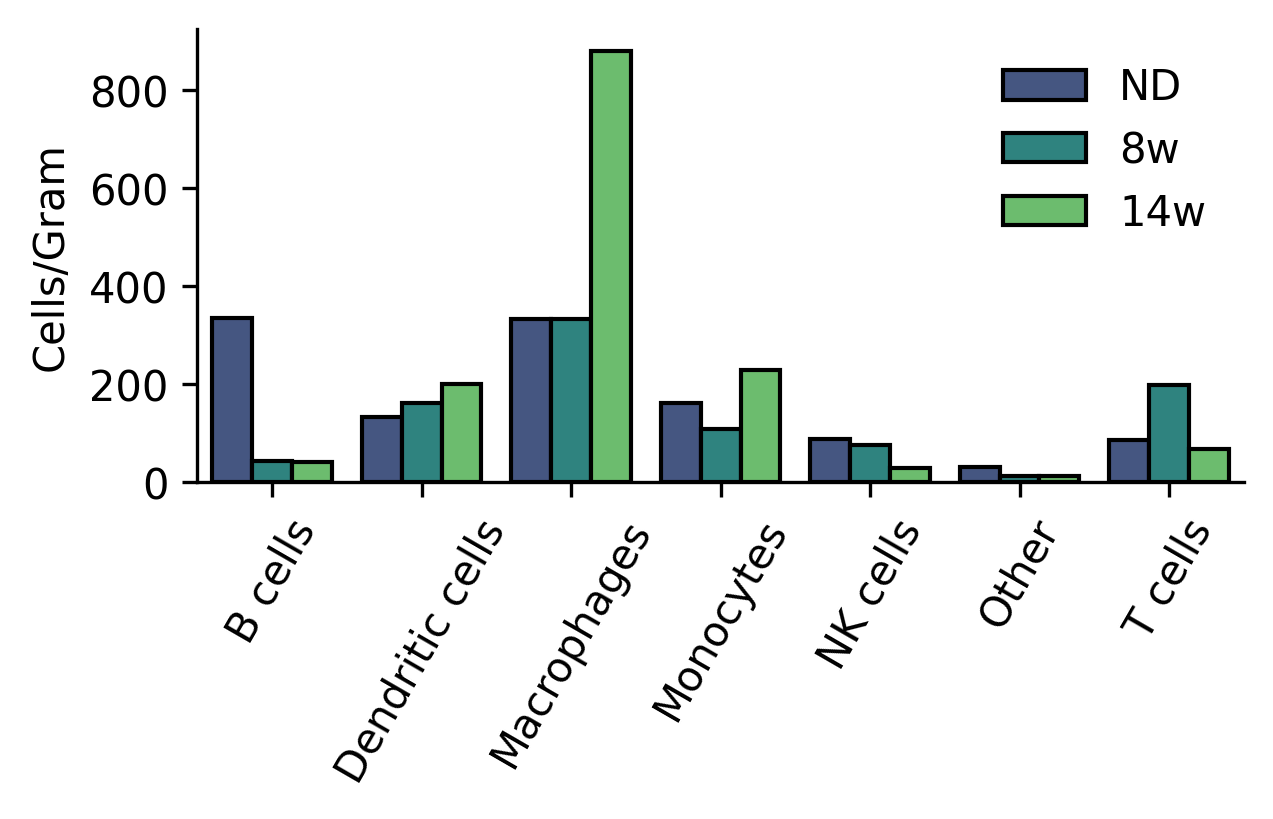

In [23]:
df['metaType'] = np.where(df['cellType'].str.contains("Mac"), 'Macrophages', df['cellType'])

gx = df.groupby(['sampleInfo', 'metaType'])['cellId'].count().reset_index()

keyMap = {
    'ND' : 'ND',
    'HFD8' : '8w',
    'HFD14' : '14w',
}
gx.columns = ['key', 'cellType', 'count']
gx['keyName'] = gx['key'].map(keyMap)

# in grams
weights = {
    'ND' : 1.079,`
    'HFD8' : 6.573,
    'HFD14' : 4.412,
}

gx['weight'] = gx['key'].map(weights)
gx['cpg'] = gx['count'] / gx['weight'] 

gx = gx.sort_values(by=['key', 'cellType'], ascending=[False, True])

gx['cellType'] = np.where(gx['cellType'] == 'Stromal cells', "Other", gx['cellType'])

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4.5, 2
plt.rcParams['figure.dpi'] = 300



sns.barplot(data=gx, 
            x='cellType', 
            y='cpg',
            edgecolor='k',
            hue='keyName',
            palette='viridis', 
           )


sns.move_legend(plt.gca(),
                title="",
                frameon=False,
                loc='upper right')

plt.xticks(rotation=60)
plt.xlabel("")
plt.ylabel("Cells/Gram")
sns.despine()
# plt.tight_layout()


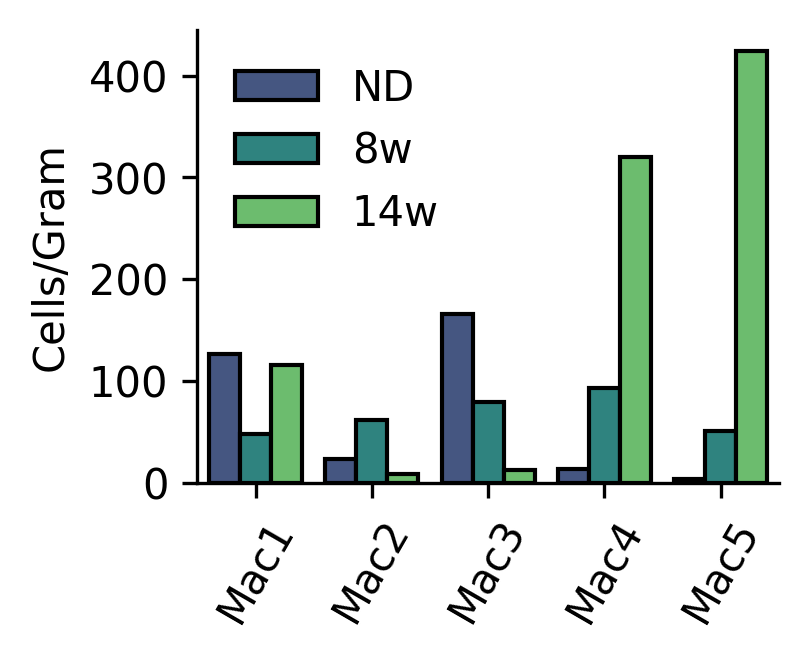

In [22]:


gx = df.groupby(['sampleInfo', 'cellType'])['cellId'].count().reset_index()

gx = gx[gx['cellType'].str.contains("Mac")]

keyMap = {
    'ND' : 'ND',
    'HFD8' : '8w',
    'HFD14' : '14w',
}
gx.columns = ['key', 'cellType', 'count']
gx['keyName'] = gx['key'].map(keyMap)

# in grams
weights = {
    'ND' : 1.079,
    'HFD8' : 6.573,
    'HFD14' : 4.412,
}

gx['weight'] = gx['key'].map(weights)
gx['cpg'] = gx['count'] / gx['weight'] 

gx = gx.sort_values(by=['key', 'cellType'], ascending=[False, True])

gx['cellType'] = np.where(gx['cellType'] == 'Stromal cells', "Other", gx['cellType'])

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 2.5, 2
plt.rcParams['figure.dpi'] = 300



sns.barplot(data=gx, 
            x='cellType', 
            y='cpg',
            edgecolor='k',
            hue='keyName',
            palette='viridis', 
           )


sns.move_legend(plt.gca(),
                title="",
                frameon=False,
                loc='upper left')

plt.xticks(rotation=60)
plt.xlabel("")
plt.ylabel("Cells/Gram")
sns.despine()
# plt.tight_layout()
